# Кластеризация ЕГЭ (4 если сделаны все задачи)

Рядом лежат данные с координатами точек. Везде используется Евклидово расстояние. Кластером считается набор не менее чем из 30 точек связанных друг с другом. Аномалия это точка находящаяся на расстоянии более 1 от любого кластера.

* Постройте Распределение точек
* Напишите руками DBSCAN и обработайте им все файлы
* Файл 0.xls также решите руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Отметьте Аномалии отдельным цветом
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите два числа - Среднее абсцисс и ординат центроидов кластеров * 100000

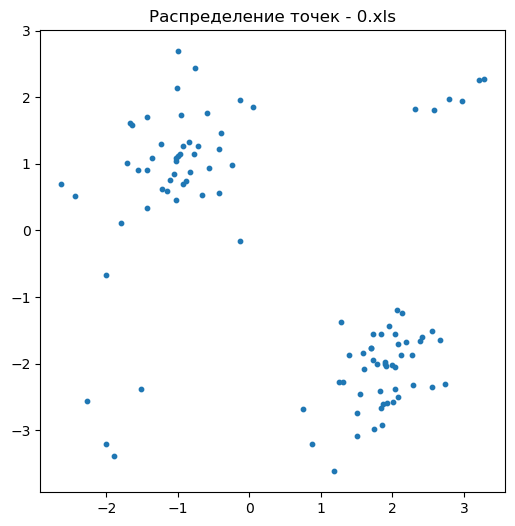

Найдено кластеров: 2
Найдено аномалий: 16


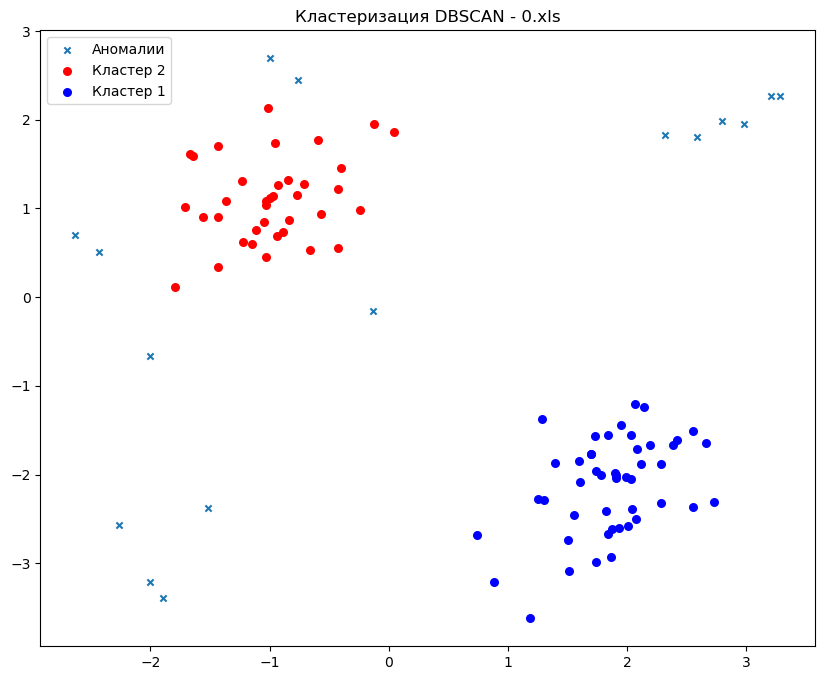


Центральные точки:
Кластер 2: (-0.9948, 1.1141)
Кластер 1: (1.9055, -2.0409)

Среднее абсцисс центроидов × 100000: 44399.14
Среднее ординат центроидов × 100000: -51244.01


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 1
file = "0.xls"
df = pd.read_excel(file, header=0) 
X = df.iloc[:, :2].values

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=10)
plt.title(f"Распределение точек - {file}")
plt.show()

# 2
class DBSCAN:
    def __init__(self, eps=1.0, min_samples=30):
        self.eps = eps
        self.min_samples = min_samples
    
    def fit_predict(self, X):
        n = len(X)
        labels = np.full(n, -1)
        cluster_id = 0
        
        for i in range(n):
            if labels[i] != -1:
                continue
            
            dists = np.sqrt(np.sum((X[i] - X)**2, axis=1))
            neighbors = np.where(dists <= self.eps)[0]
            
            if len(neighbors) < self.min_samples:
                labels[i] = 0
                continue
            
            cluster_id += 1
            labels[i] = cluster_id
            seeds = list(neighbors)
            if i in seeds:
                seeds.remove(i)
            
            j = 0
            while j < len(seeds):
                seed = seeds[j]
                if labels[seed] == 0:
                    labels[seed] = cluster_id
                elif labels[seed] == -1:
                    labels[seed] = cluster_id
                    seed_dists = np.sqrt(np.sum((X[seed] - X)**2, axis=1))
                    seed_neighbors = np.where(seed_dists <= self.eps)[0]
                    if len(seed_neighbors) >= self.min_samples:
                        for nbr in seed_neighbors:
                            if nbr not in seeds:
                                seeds.append(nbr)
                j += 1
        
        self.labels = labels
        return labels

# 3
dbscan = DBSCAN(eps=1.0, min_samples=30)
labels = dbscan.fit_predict(X)

clusters = {}
anomalies = []

for i, label in enumerate(labels):
    if label == 0:
        anomalies.append(i)
    elif label > 0:
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(i)

final_clusters = {}
for cid, points in clusters.items():
    if len(points) >= 30:
        final_clusters[cid] = points
    else:
        anomalies.extend(points)

print(f"Найдено кластеров: {len(final_clusters)}")
print(f"Найдено аномалий: {len(anomalies)}")

# 4,5
plt.figure(figsize=(10,8))

# Аном
if anomalies:
    anomaly_pts = X[anomalies]
    plt.scatter(anomaly_pts[:,0], anomaly_pts[:,1], s=20, marker='x', label='Аномалии')

# Класт
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
for idx, (cid, points) in enumerate(final_clusters.items()):
    cluster_pts = X[points]
    plt.scatter(cluster_pts[:,0], cluster_pts[:,1], s=30, color=colors[idx % len(colors)], label=f'Кластер {cid}')

plt.title(f"Кластеризация DBSCAN - {file}")
plt.legend()
plt.show()

#6
central_points = []
for cid, points in final_clusters.items():
    cluster_pts = X[points]
    n = len(cluster_pts)
    min_total_dist = float('inf')
    best_idx = -1
    
    for i in range(n):
        total_dist = 0
        for j in range(n):
            if i != j:
                dx = cluster_pts[i][0] - cluster_pts[j][0]
                dy = cluster_pts[i][1] - cluster_pts[j][1]
                total_dist += np.sqrt(dx*dx + dy*dy)
        
        if total_dist < min_total_dist:
            min_total_dist = total_dist
            best_idx = i
    
    if best_idx != -1:
        central_points.append({
            'cluster': cid,
            'point': cluster_pts[best_idx],
            'avg_dist': min_total_dist/(n-1) if n>1 else 0
        })

print("\nЦентральные точки:")
for cp in central_points:
    print(f"Кластер {cp['cluster']}: ({cp['point'][0]:.4f}, {cp['point'][1]:.4f})")

# 7
if final_clusters:
    centroids = []
    for cid, points in final_clusters.items():
        centroid = np.mean(X[points], axis=0)
        centroids.append(centroid)
    
    mean_centroid = np.mean(centroids, axis=0)
    result_x = mean_centroid[0] * 100000
    result_y = mean_centroid[1] * 100000
    
    print(f"\nСреднее абсцисс центроидов × 100000: {result_x:.2f}")
    print(f"Среднее ординат центроидов × 100000: {result_y:.2f}")
else:
    print("Нет кластеров")

# Кластеризация (1 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [9]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

c:\Users\yura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\yura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\yura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\yura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

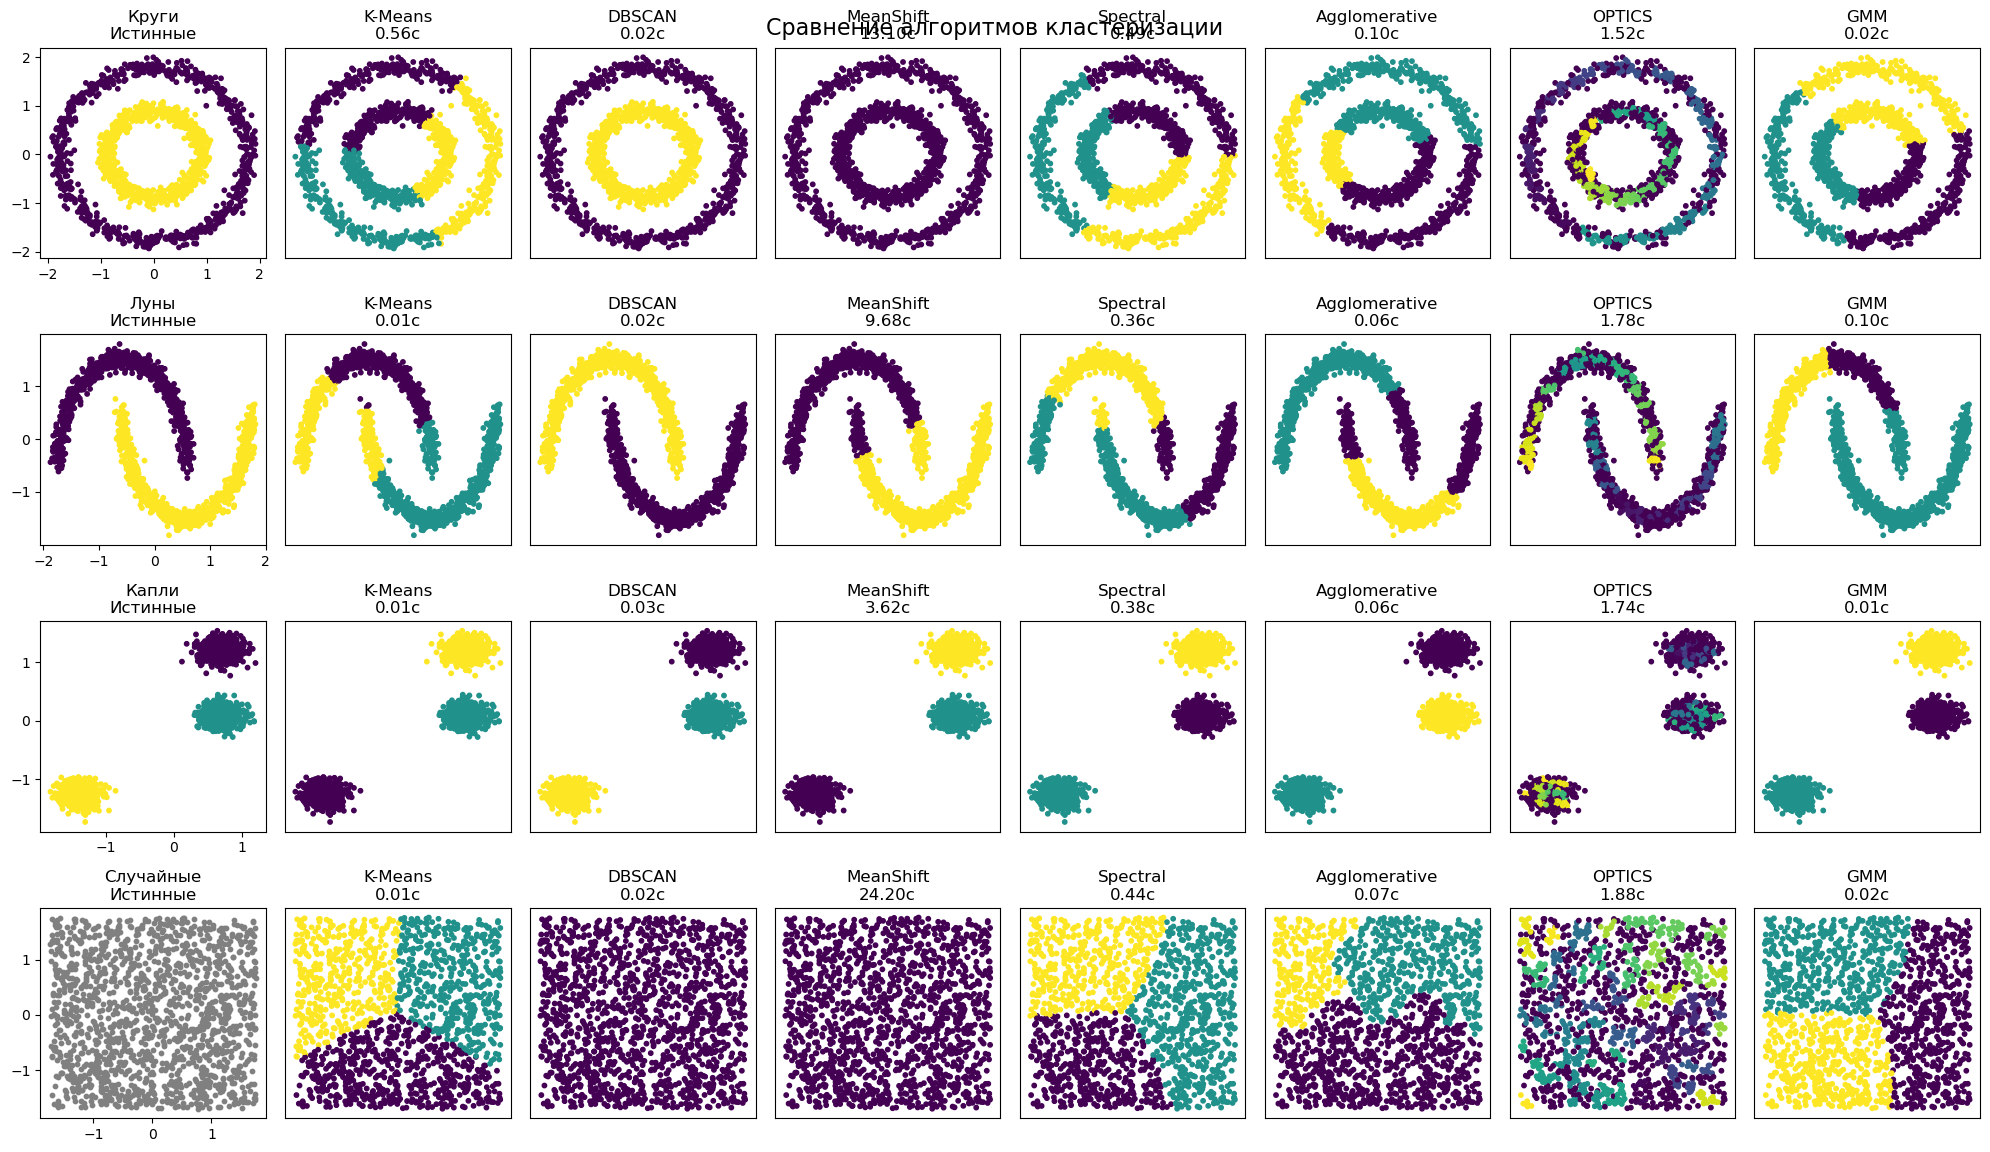

In [11]:
import time
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
n_samples = 1500

datasets_list = [
    ("Круги", datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)),
    ("Луны", datasets.make_moons(n_samples=n_samples, noise=0.05)),
    ("Капли", datasets.make_blobs(n_samples=n_samples, random_state=8)),
    ("Случайные", (np.random.rand(n_samples, 2), None))
]

# Алгоритмы
algorithms = [
    ("K-Means", KMeans(n_clusters=3)),
    ("DBSCAN", DBSCAN(eps=0.3)),
    ("MeanShift", MeanShift()),
    ("Spectral", SpectralClustering(n_clusters=3)),
    ("Agglomerative", AgglomerativeClustering(n_clusters=3)),
    ("OPTICS", OPTICS()),
    ("GMM", GaussianMixture(n_components=3))
]

fig, axes = plt.subplots(len(datasets_list), len(algorithms)+1, figsize=(20, 12))

for row, (name, (X, y_true)) in enumerate(datasets_list):
    X_scaled = StandardScaler().fit_transform(X)
    
    # Исходные данные
    axes[row,0].scatter(X_scaled[:,0], X_scaled[:,1], s=10, c=y_true if y_true is not None else 'gray')
    axes[row,0].set_title(f"{name}\nИстинные")
    
    # Результаты алгоритмов
    for col, (algo_name, algo) in enumerate(algorithms, 1):
        try:
            start = time.time()
            
            if algo_name == "GMM":
                y_pred = algo.fit_predict(X_scaled)
            else:
                y_pred = algo.fit_predict(X_scaled)
            
            time_taken = time.time() - start
            
            axes[row,col].scatter(X_scaled[:,0], X_scaled[:,1], s=10, c=y_pred)
            axes[row,col].set_title(f"{algo_name}\n{time_taken:.2f}с")
            axes[row,col].set_xticks([])
            axes[row,col].set_yticks([])
            
        except Exception as e:
            axes[row,col].text(0.5, 0.5, "Ошибка", ha='center', va='center')
            axes[row,col].set_title(f"{algo_name}\nОшибка")
            axes[row,col].set_xticks([])
            axes[row,col].set_yticks([])

plt.suptitle("Сравнение алгоритмов кластеризации", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()